<img height="100" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="250"/>

# Pré-processamento dos dados

In [44]:
import os
from warnings import filterwarnings

import pandas as pd

filterwarnings("ignore")
path = os.path.join(os.getcwd(), 'data', "DADOS_ARTIGO_AMENDOIM.xlsx")
df = pd.read_excel(path,"Dados_finais")
df.drop(columns=["Dia","Rep",'DC','DG','NDJ',
                 'PS','NAC','Qg','DR','URMIN','URMAX','UR2M',"P-ETP","Qo",'ETR',"ALT","Rajada Máxima","EXC","TMAX","TMIN"], inplace=True)
df.rename(columns=dict(Fotop="N"),inplace=True)

In [45]:
# Selecionar a primeira ocorrência de cada estádio fenológico
df = df.drop_duplicates(subset=['Cultivar','Estadio'], keep='first')

In [46]:
from scipy.stats import zscore

# Padronizar os dados gerais
df_pad = zscore(df.drop(columns=['Cultivar', 'Estadio']))

# Spearman correlation

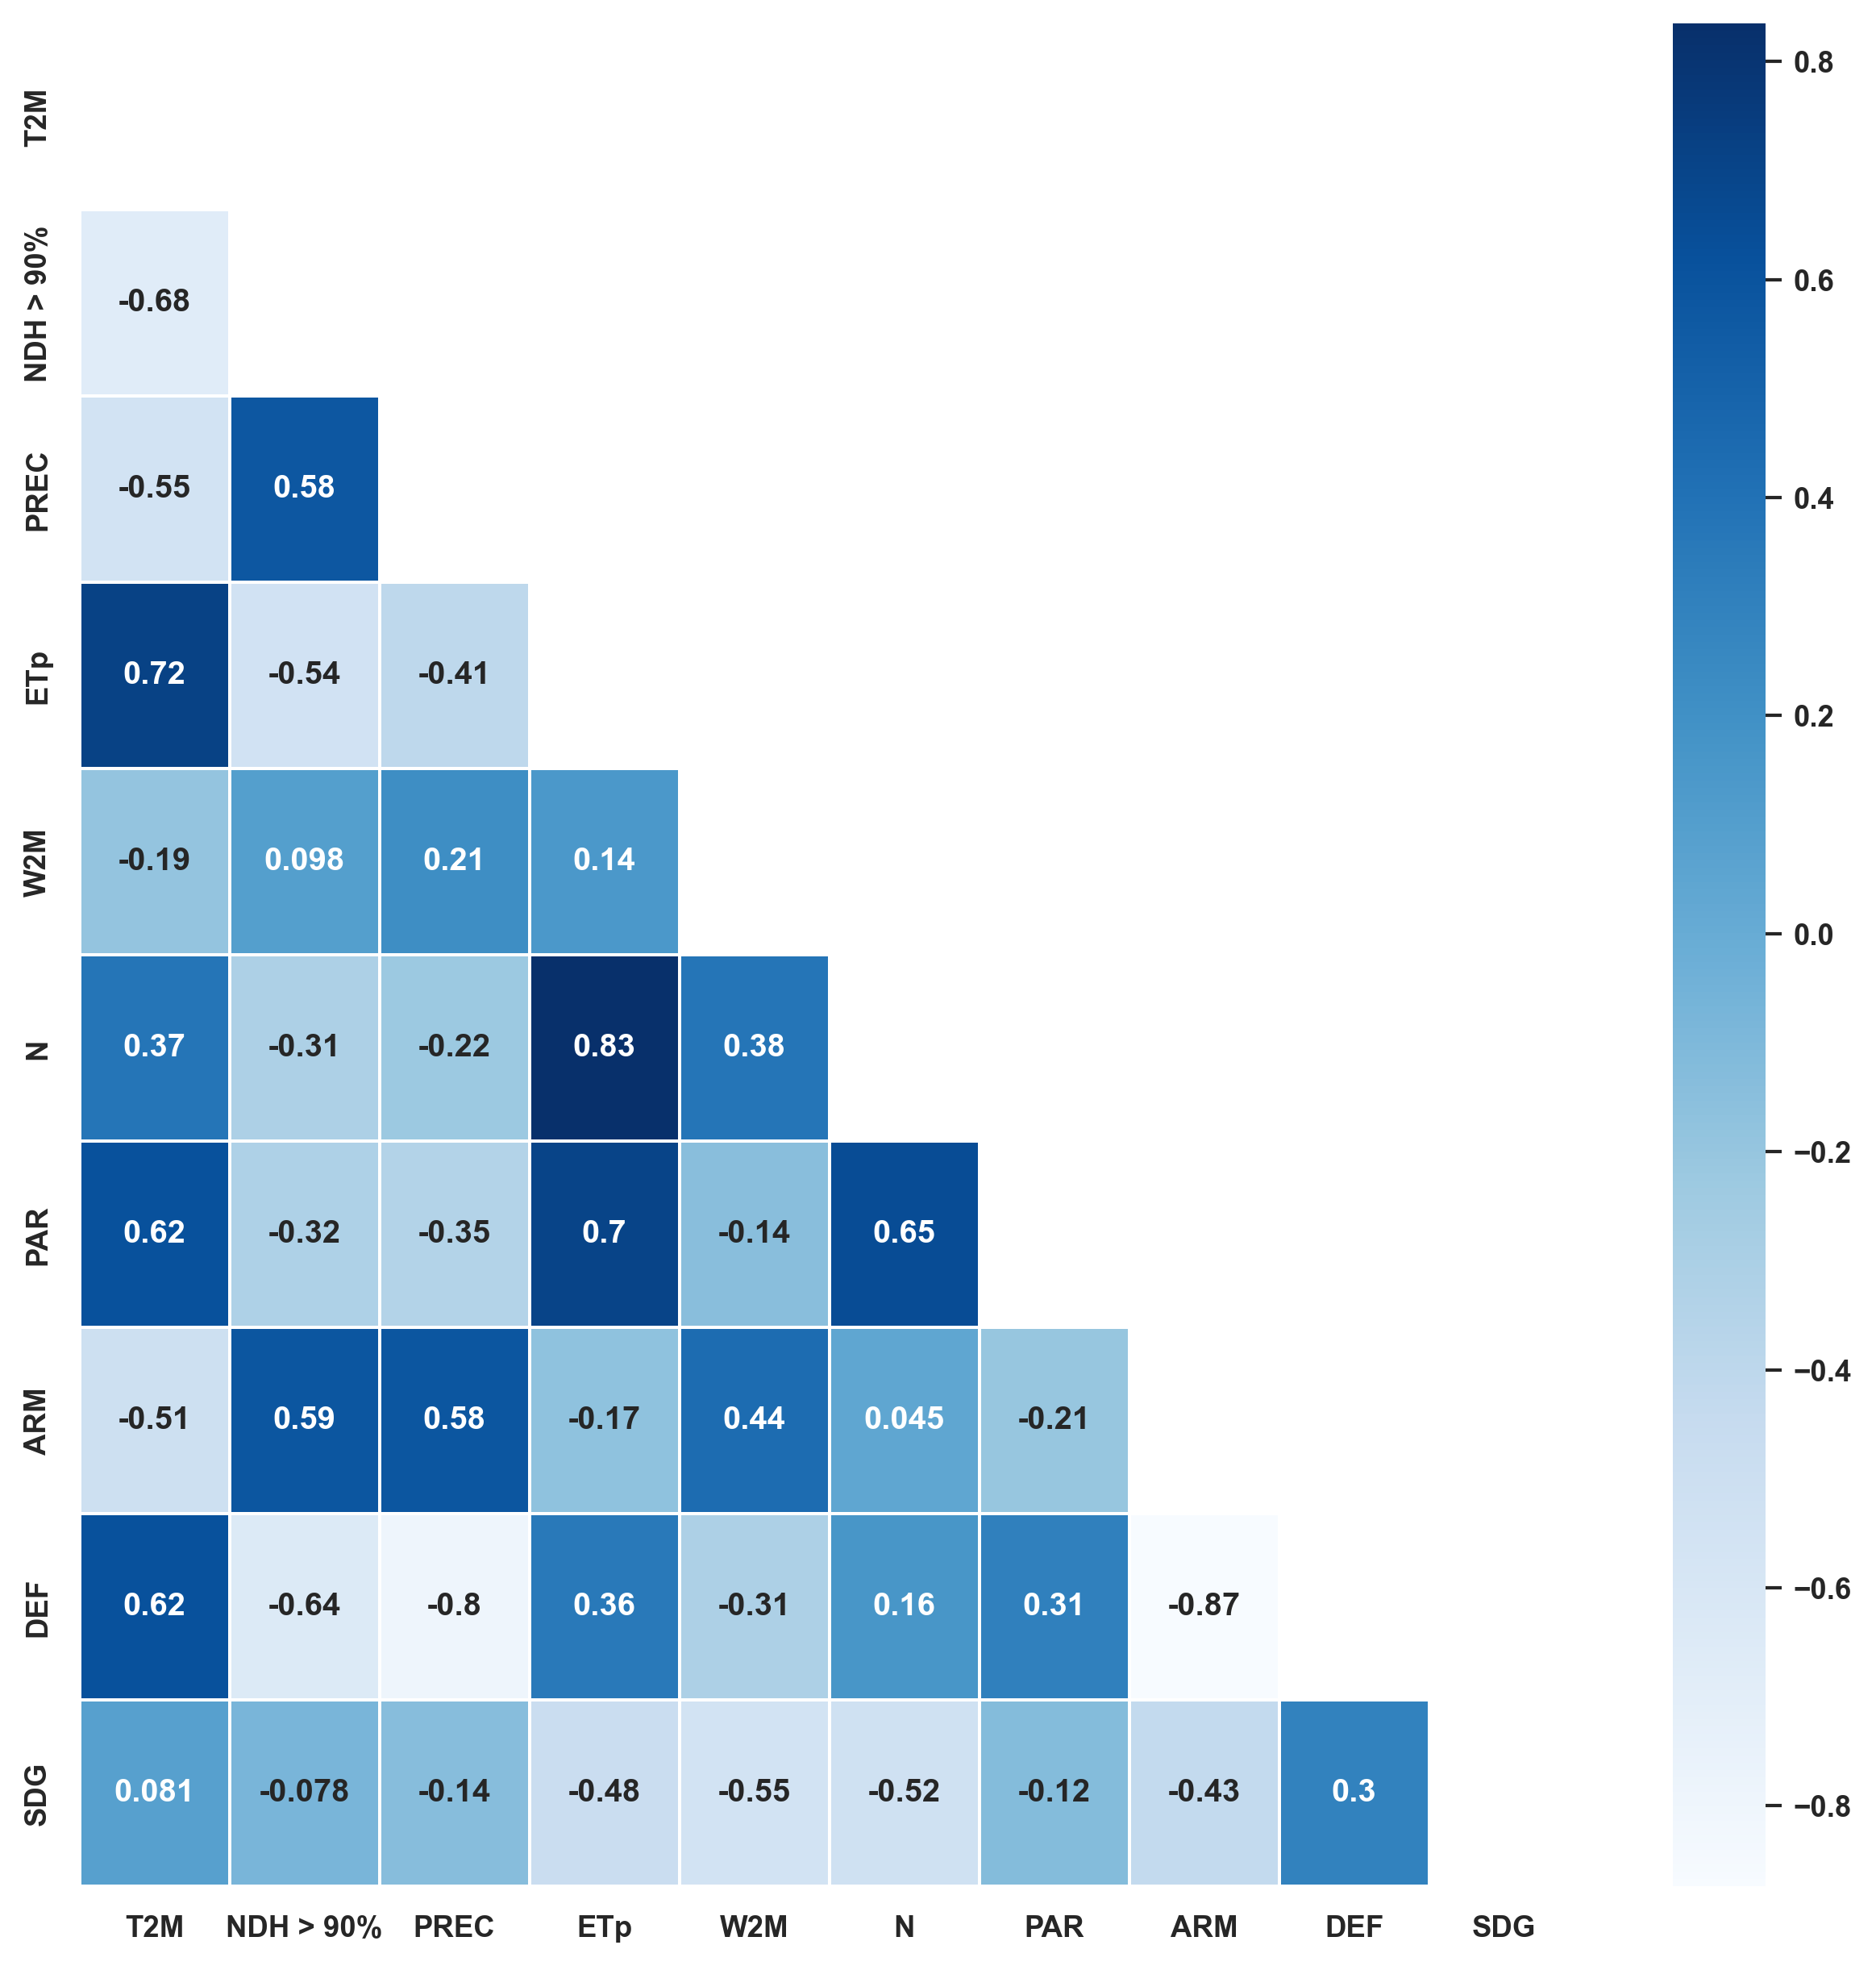

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo dados padronizados para DataFrame
dados_pad_df = pd.DataFrame(df_pad, columns=df.columns[2:], index=df.index)

# Calculando a matriz de correlação de Spearman
corr_matrix = dados_pad_df.corr(method='spearman')

# Criando uma máscara para a diagonal superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurando o tamanho e a resolução da figura
plt.figure(figsize=(10, 10), dpi=300)

# Plotando o heatmap com a máscara
sns.set_theme(style='white', context="paper")
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues", linewidths=.9)
plt.grid(False)

# Exibindo o gráfico
plt.show()

| Climatic parameter | Description | Numerical quantity |
| --- | --- | --- |
| T2M | Mean temperature | °C |
| NDH>90% | Hours with relative humidity above 90% | hours |
| N | Daily light exposure duration | hours |
| PREC | Precipitation | mm |
| ARM | Water soil storage | mm |
| DEF | Water soil deficiency | mm |
| Qg | Global radiation | MJ m⁻² d⁻¹ |
| PAR | Photosynthetically active radiation | MJ m⁻² d⁻¹ |
| SDG | Sum of degree-days | °C d⁻¹ |
| W2M | Wind speed at 2 m | m s⁻¹ |
| ETp | Potential evapotranspiration | mm d⁻¹ |


In [48]:
# Removendo colunas colineares
#df.drop(columns=['PS','NAC','Qg','DR','URMIN','URMAX','UR2M',"P-ETP","Qo",'ETR',"ALT","Rajada Máxima","EXC","TMAX","TMIN"], inplace=True)

In [49]:
# Cluster 1:  Cultivar C10, C14, C15, C16, C17, C18, C19, C20, C9 (Precoce)
df1 = df.loc[df['Cultivar'].isin(["C10", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C9"])].reset_index(
    drop=True)
df1_pad = zscore(df1.drop(columns=['Cultivar', 'Estadio']))

# Cluster 2:  Cultivar C1, C11, C7 (Tardio)
df2 = df.loc[df['Cultivar'].isin(["C1", "C11", "C7"])].reset_index(drop=True)
df2_pad = zscore(df2.drop(columns=['Cultivar', 'Estadio']))

# Cluster 3:  Cultivar C12, C13, C2, C21, C22, C3, C4, C5, C6, C8 (Normal)
df3 = df.loc[df['Cultivar'].isin(["C12", "C13", "C2", "C21", "C22", "C3", "C4", "C5", "C6", "C8"])].reset_index(
    drop=True)
df3_pad = zscore(df3.drop(columns=['Cultivar', 'Estadio']))

# Cluster 1

In [50]:
from pca import pca

# Converter dados padronizados para DataFrame mantendo os nomes das colunas 
dados_pad_df = pd.DataFrame(df1_pad, columns=df1.drop(columns=['Cultivar',"Estadio"]).columns)

# Criar e ajustar o modelo PCA
modelo = pca(n_components=2,
             alpha=0.05,
             random_state=42,
             verbose=4)

resultado = modelo.fit_transform(dados_pad_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >DEBUG> Set verbose to 10
[scatterd] >DEBUG> Colors are all set to [0, 0.1, 0.4].
[scatterd] >DEBUG> Colors are based on the input [labels] and on [cmap].
[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


<Figure size 1000x1000 with 0 Axes>

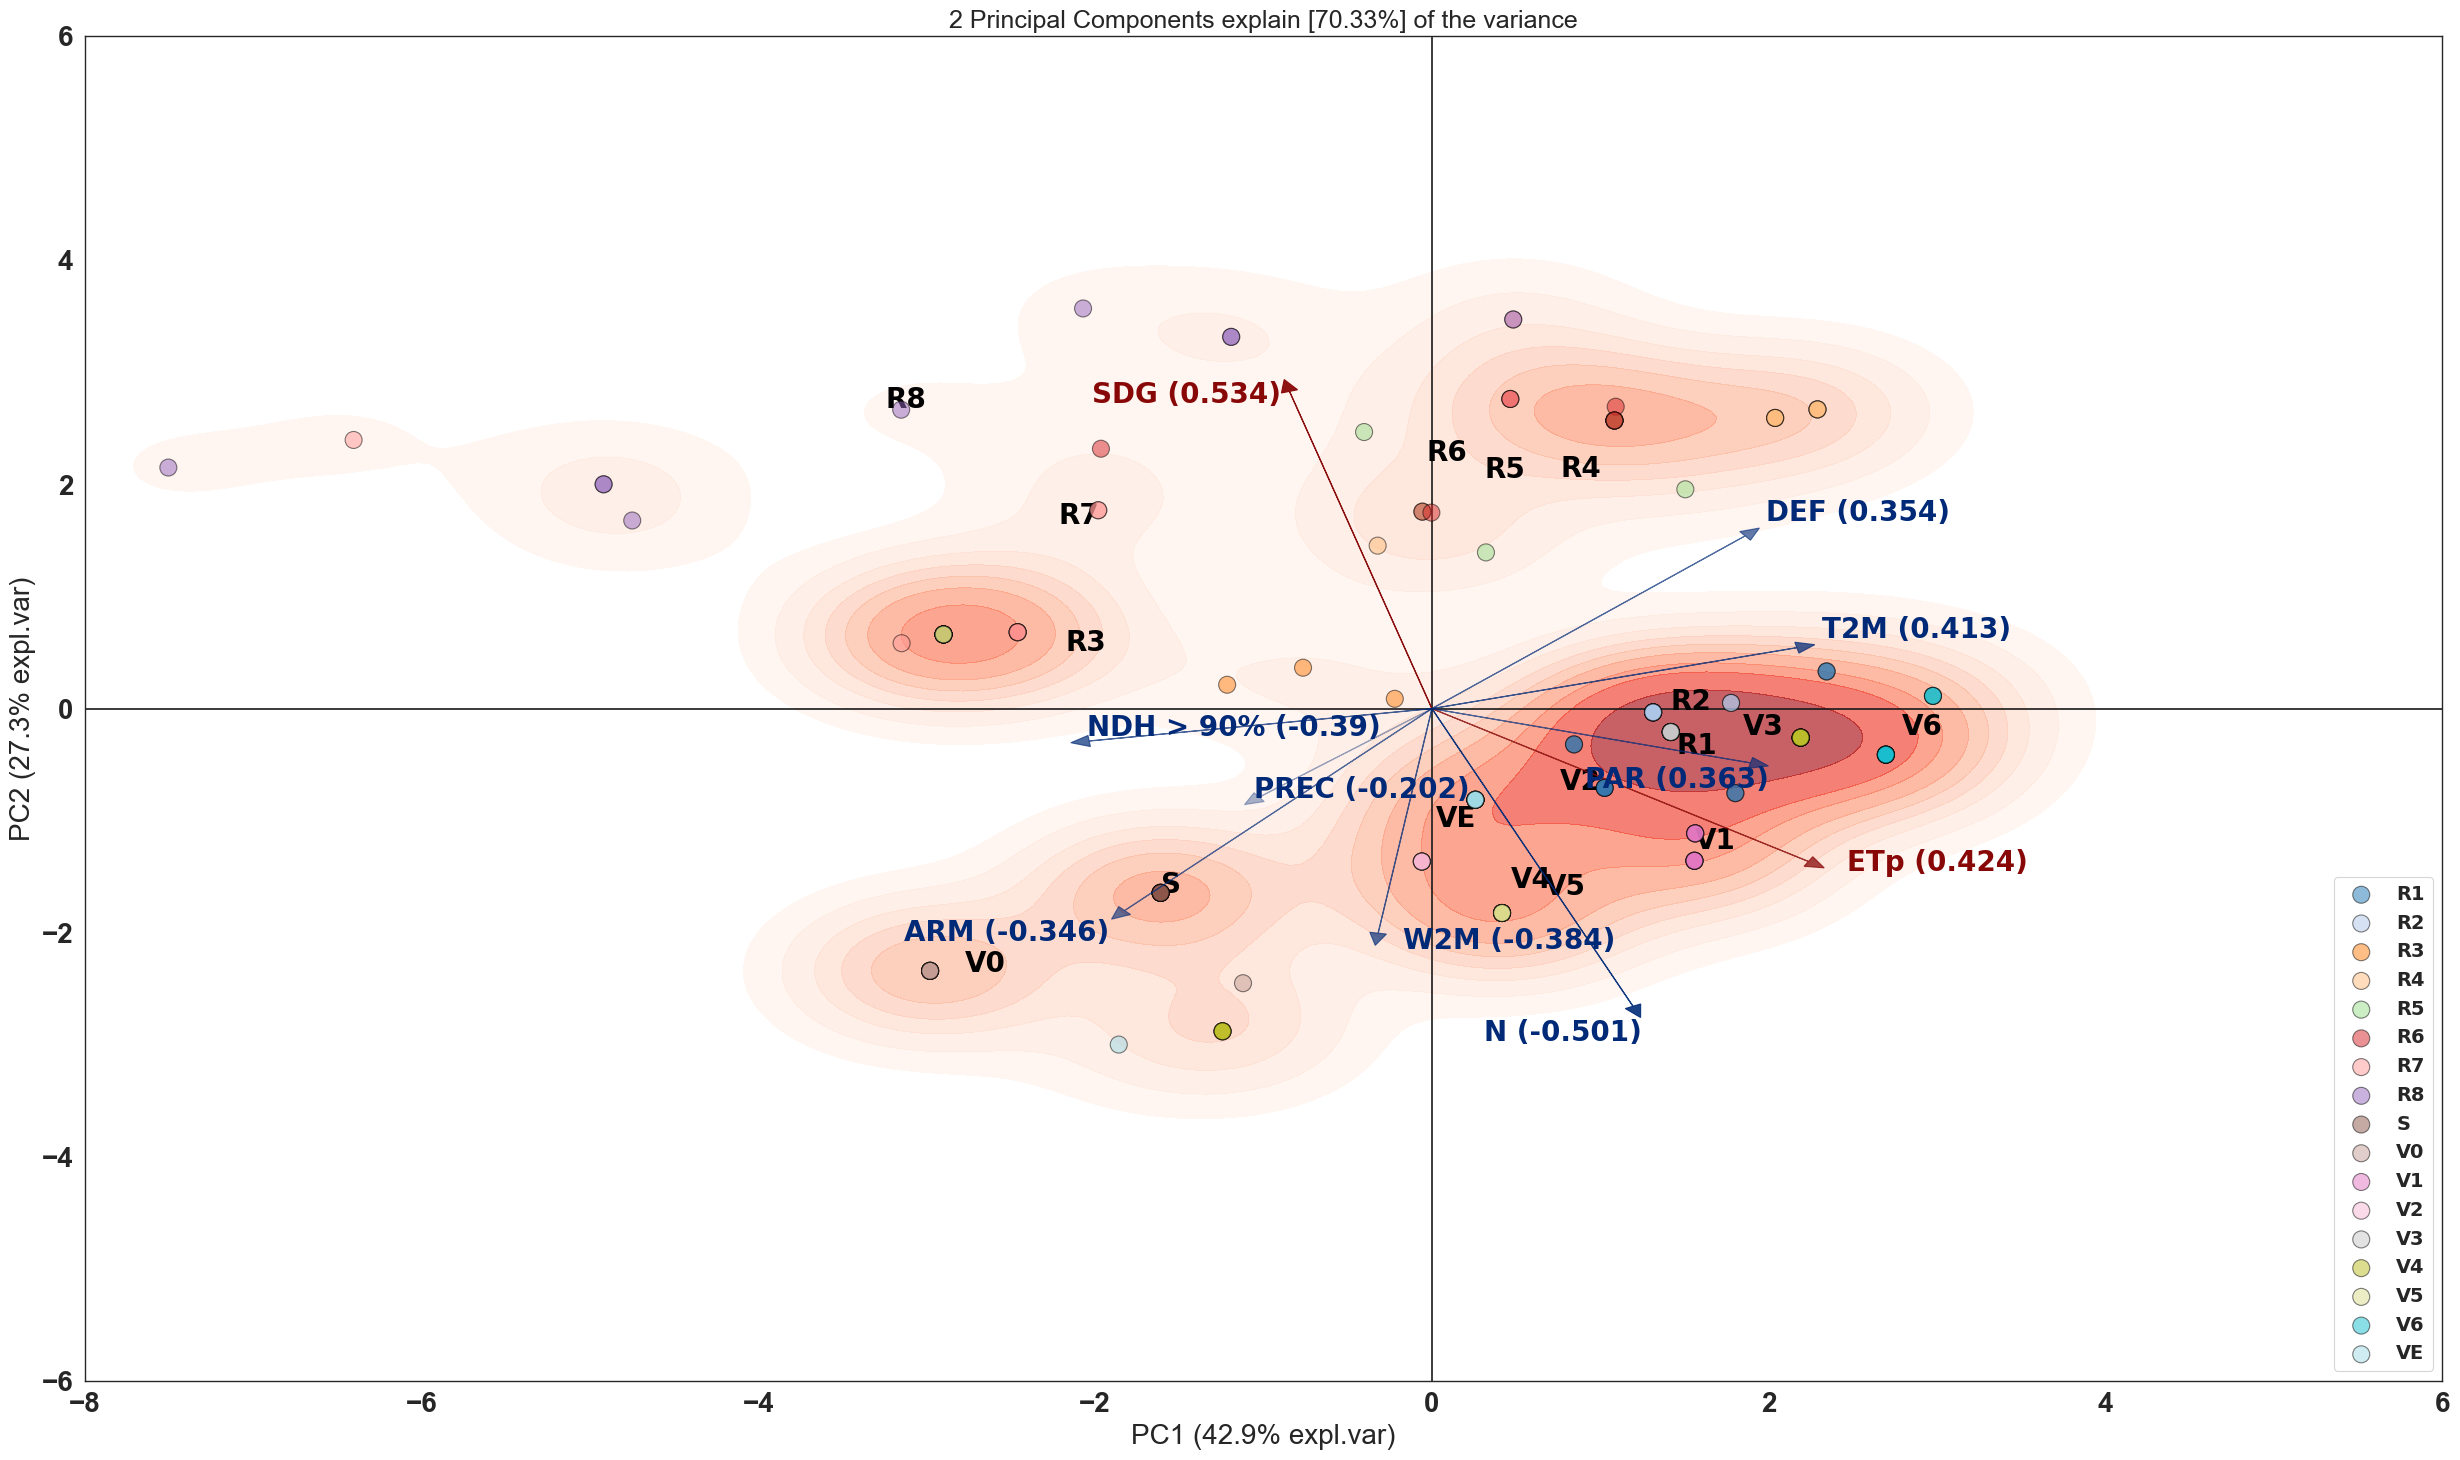

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir as configurações da figura para evitar tamanhos excessivos
sns.set_theme(style="white", context="paper")
plt.figure(figsize=(10, 10))  # Ajuste o tamanho conforme necessário

# Remova o parâmetro variable_names que está causando o erro
modelo.biplot(cmap="tab20", legend=4, density=True, SPE=False, marker='o', visible=True, jitter=0, fontweight="bold",
              arrowdict={'fontsize': 20}, fontsize=20, labels=df1['Estadio'].values, alpha=0.5)

# Adicionar linhas centrais
plt.plot([0, 0], [-10, 10], "k-")
plt.plot([-10, 10], [0, 0], "k-")

# Definir os limites do gráfico
plt.xlim(-8, 6)
plt.ylim(-6, 6)
plt.tight_layout()

##plt.title("")
plt.grid(False)
fig_path = os.path.join(os.getcwd(), 'images', "Figure 3.jpg")
#plt.savefig(fig_path, dpi=600)

# Mostrar o gráfico
plt.show()

In [52]:
print("Variância explicada por cada componente:")
print(f"{resultado['explained_var'][1]*100:.2f}% Precoce")
resultado['topfeat'].round(3)

Variância explicada por cada componente:
70.33% Precoce


,PC,feature,loading,type
0,PC1,ETp,0.424,best
1,PC2,SDG,0.534,best
2,PC1,T2M,0.413,weak
3,PC1,NDH > 90%,-0.390,weak
4,PC1,PREC,-0.202,weak
5,PC2,W2M,-0.384,weak
6,PC2,N,-0.501,weak
7,PC1,PAR,0.363,weak
8,PC1,ARM,-0.346,weak
9,PC1,DEF,0.354,weak


In [53]:
# Converter dados padronizados para DataFrame mantendo os nomes das colunas
dados_pad_df = pd.DataFrame(df2_pad, columns=df2.drop(columns=['Cultivar',"Estadio"]).columns)

# Criar e ajustar o modelo PCA
modelo = pca(n_components=2,
             alpha=0.05,
             random_state=42,
             verbose=4)

resultado = modelo.fit_transform(dados_pad_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >DEBUG> Set verbose to 10
[scatterd] >DEBUG> Colors are all set to [0, 0.1, 0.4].
[scatterd] >DEBUG> Colors are based on the input [labels] and on [cmap].
[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


<Figure size 1000x1000 with 0 Axes>

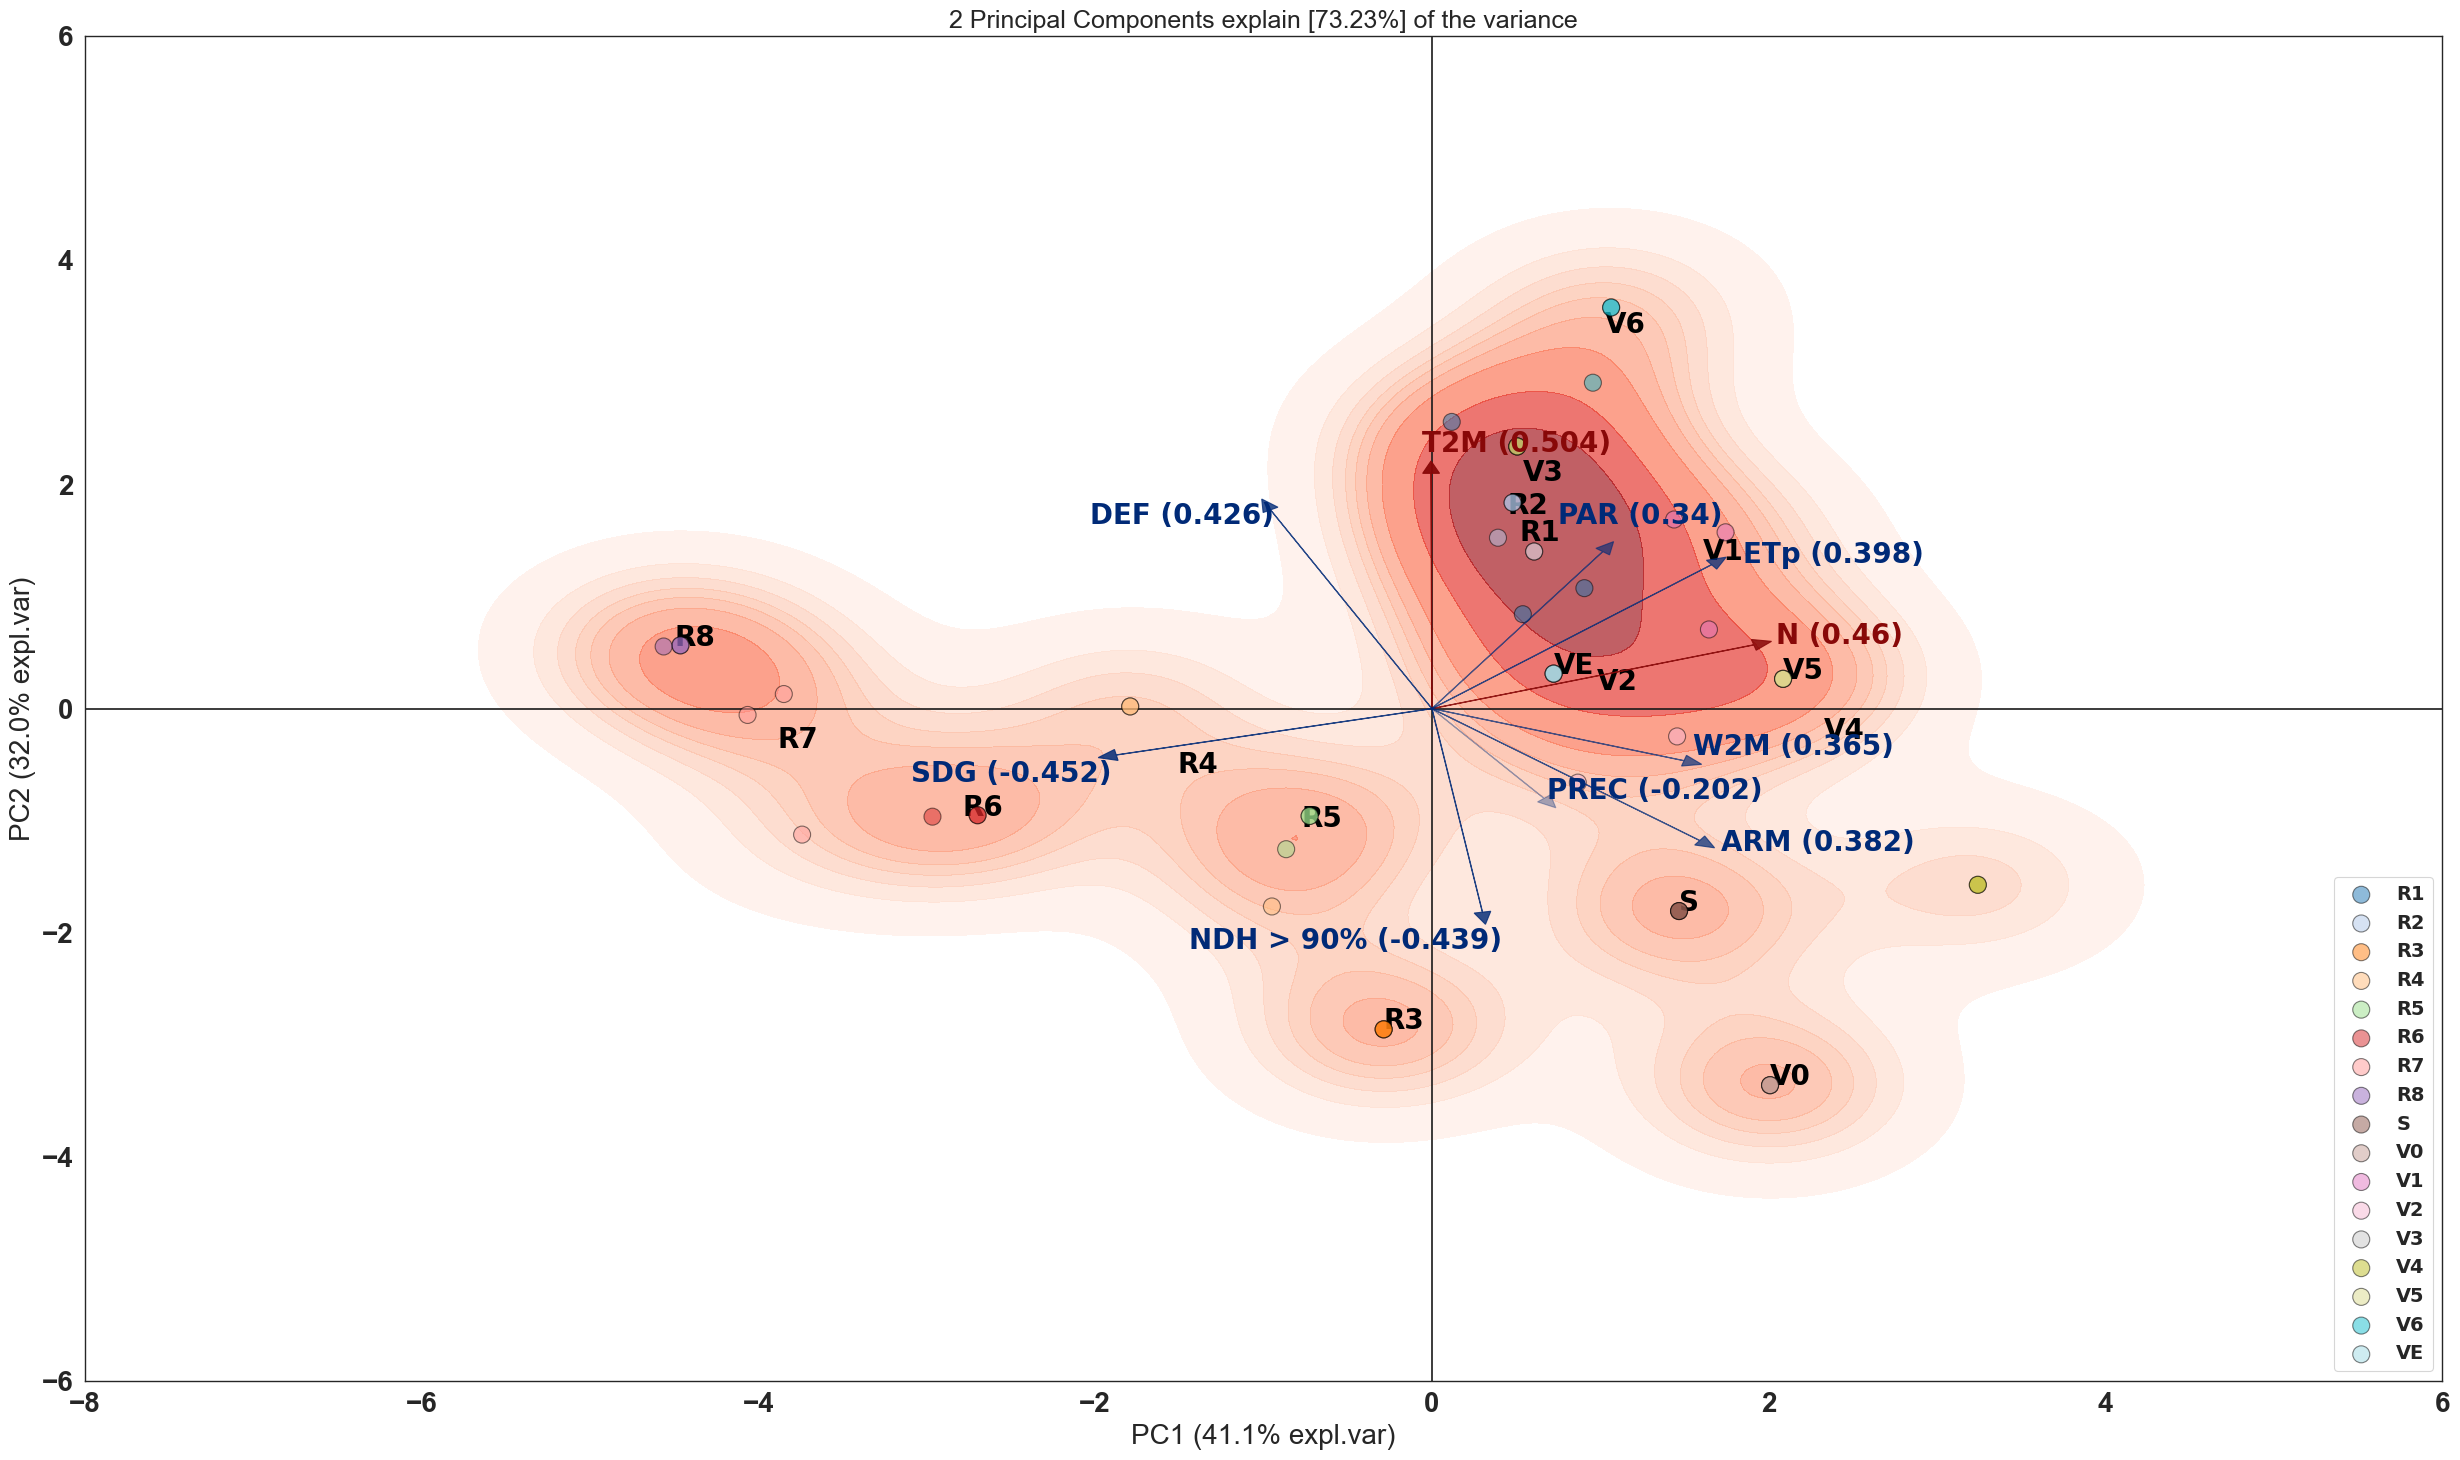

In [54]:
# Definir as configurações da figura para evitar tamanhos excessivos
sns.set_theme(style="white", context="paper")
plt.figure(figsize=(10, 10))  # Ajuste o tamanho conforme necessário

# Remova o parâmetro variable_names que está causando o erro
modelo.biplot(cmap="tab20", legend=4, density=True, SPE=False, marker='o', visible=True, jitter=0, fontweight="bold",
              arrowdict={'fontsize': 20}, fontsize=20, labels=df2['Estadio'].values, alpha=0.5)

# Adicionar linhas centrais
plt.plot([0, 0], [-10, 10], "k-")
plt.plot([-10, 10], [0, 0], "k-")

# Definir os limites do gráfico
plt.xlim(-8, 6)
plt.ylim(-6, 6)
plt.tight_layout()

##plt.title("")
plt.grid(False)
fig_path = os.path.join(os.getcwd(), 'images', "Figure 4.jpg")
#plt.savefig(fig_path, dpi=600)

# Mostrar o gráfico
plt.show();

In [55]:
print("Variância explicada por cada componente:")
print(f"{resultado['explained_var'][1]*100:.2f}% Tardio")
resultado['topfeat'].round(3)

Variância explicada por cada componente:
73.23% Tardio


,PC,feature,loading,type
0,PC1,N,0.460,best
1,PC2,T2M,0.504,best
2,PC2,NDH > 90%,-0.439,weak
3,PC2,PREC,-0.202,weak
4,PC1,ETp,0.398,weak
5,PC1,W2M,0.365,weak
6,PC2,PAR,0.340,weak
7,PC1,ARM,0.382,weak
8,PC2,DEF,0.426,weak
9,PC1,SDG,-0.452,weak


# Cluster 3

In [56]:
# Converter dados padronizados para DataFrame mantendo os nomes das colunas
dados_pad_df = pd.DataFrame(df3_pad, columns=df3.drop(columns=['Cultivar',"Estadio"]).columns)

# Criar e ajustar o modelo PCA
modelo = pca(n_components=2,
             alpha=0.05,
             random_state=42,
             verbose=4)

resultado = modelo.fit_transform(dados_pad_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >DEBUG> Set verbose to 10
[scatterd] >DEBUG> Colors are all set to [0, 0.1, 0.4].
[scatterd] >DEBUG> Colors are based on the input [labels] and on [cmap].
[scatterd] >INFO> Add density layer


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


<Figure size 1000x1000 with 0 Axes>

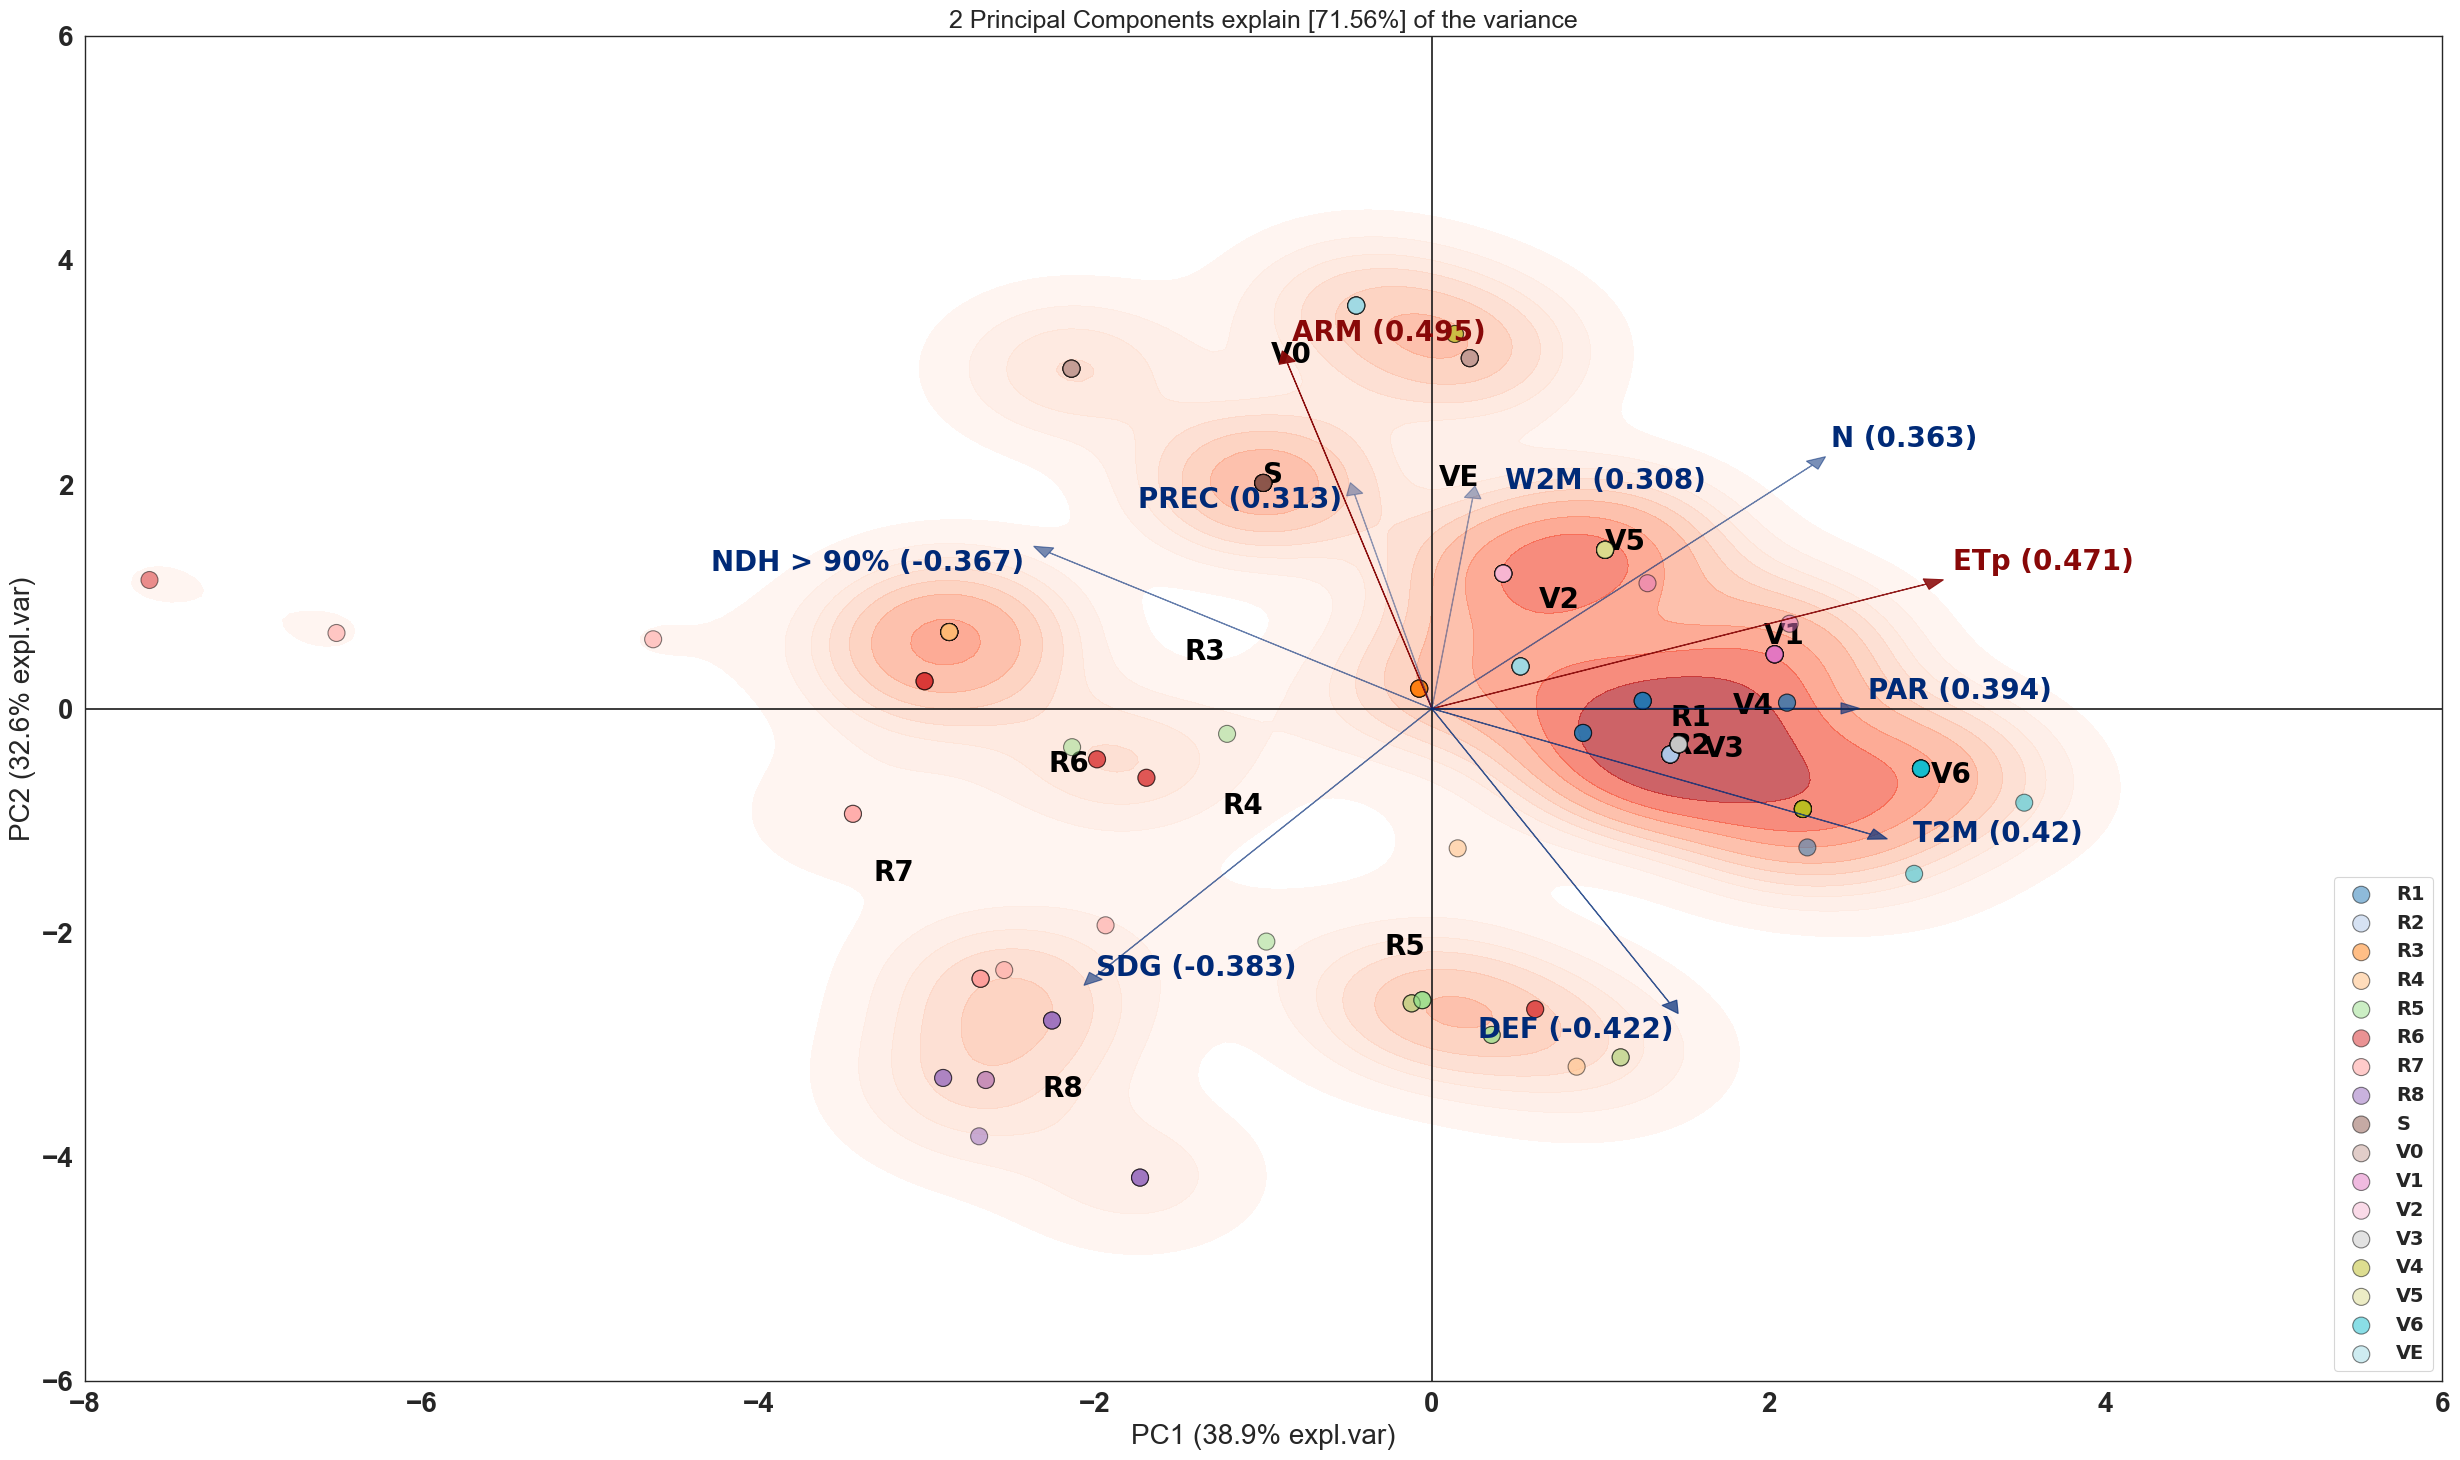

In [57]:
# Definir as configurações da figura para evitar tamanhos excessivos
sns.set_theme(style="white", context="paper")
plt.figure(figsize=(10, 10))  # Ajuste o tamanho conforme necessário

# Remova o parâmetro variable_names que está causando o erro
modelo.biplot(cmap="tab20", legend=4, density=True, SPE=False, marker='o', visible=True, jitter=0, fontweight="bold",
              arrowdict={'fontsize': 20}, fontsize=20, labels=df3['Estadio'].values, alpha=0.5)

# Adicionar linhas centrais
plt.plot([0, 0], [-10, 10], "k-")
plt.plot([-10, 10], [0, 0], "k-")

# Definir os limites do gráfico
plt.xlim(-8, 6)
plt.ylim(-6, 6)
plt.tight_layout()

##plt.title("")
plt.grid(False)
fig_path = os.path.join(os.getcwd(), 'images', "Figure 5.jpg")
#plt.savefig(fig_path, dpi=600)

# Mostrar o gráfico
plt.show();

In [58]:
# Visualizar a variância explicada
print("Variância explicada por cada componente:")
print(f"{resultado['explained_var'][1]*100:.2f}% Normal")
resultado['topfeat'].round(3)

Variância explicada por cada componente:
71.57% Normal


,PC,feature,loading,type
0,PC1,ETp,0.471,best
1,PC2,ARM,0.495,best
2,PC1,T2M,0.420,weak
3,PC1,NDH > 90%,-0.367,weak
4,PC2,PREC,0.313,weak
5,PC2,W2M,0.308,weak
6,PC1,N,0.363,weak
7,PC1,PAR,0.394,weak
8,PC2,DEF,-0.422,weak
9,PC2,SDG,-0.383,weak


In [62]:
# Dicionário para armazenar os resultados por tipo de cultivar
cultivar_results = {}

# CLUSTER 1 - PRECOCE
# Converter dados padronizados para DataFrame mantendo os nomes das colunas
dados_pad_df1 = pd.DataFrame(df1_pad, columns=df1.drop(columns=['Cultivar',"Estadio"]).columns)
modelo1 = pca(n_components=2, alpha=0.05, random_state=42, verbose=0)
resultado1 = modelo1.fit_transform(dados_pad_df1)

# Extrair autovetores (eigenvectors/loadings)
loadings1 = resultado1['loadings']
# Extrair scores
scores1 = resultado1['PC']
# Combinar com rótulos de estágio
scores_with_labels1 = pd.DataFrame(scores1)
scores_with_labels1['Estadio'] = df1['Estadio'].values
scores_with_labels1['Tipo'] = 'Early'

# CLUSTER 2 - TARDIO
dados_pad_df2 = pd.DataFrame(df2_pad, columns=df2.drop(columns=['Cultivar',"Estadio"]).columns)
modelo2 = pca(n_components=2, alpha=0.05, random_state=42, verbose=0)
resultado2 = modelo2.fit_transform(dados_pad_df2)

# Extrair autovetores e scores
loadings2 = resultado2['loadings']
scores2 = resultado2['PC']
scores_with_labels2 = pd.DataFrame(scores2)
scores_with_labels2['Estadio'] = df2['Estadio'].values
scores_with_labels2['Tipo'] = 'Late'

# CLUSTER 3 - NORMAL
dados_pad_df3 = pd.DataFrame(df3_pad, columns=df3.drop(columns=['Cultivar',"Estadio"]).columns)
modelo3 = pca(n_components=2, alpha=0.05, random_state=42, verbose=0)
resultado3 = modelo3.fit_transform(dados_pad_df3)

# Extrair autovetores e scores
loadings3 = resultado3['loadings']
scores3 = resultado3['PC']
scores_with_labels3 = pd.DataFrame(scores3)
scores_with_labels3['Estadio'] = df3['Estadio'].values
scores_with_labels3['Tipo'] = 'Normal'

# Combinar todos os scores em um único dataframe
all_scores = pd.concat([scores_with_labels1, scores_with_labels2, scores_with_labels3])

# Renomear as colunas para melhor clareza
all_scores.rename(columns={0: 'PC1', 1: 'PC2'}, inplace=True)

# Mostrar o dataframe com os scores
# print("Scores por estágio e tipo de cultivar:")
# print(all_scores)

# Criar um dataframe com loadings (eigenvectors) para cada tipo de cultivar
loadings_precoce = pd.DataFrame(loadings1.T, index=dados_pad_df1.columns, columns=['PC1','PC2'])
loadings_precoce['Tipo'] = 'Early'

loadings_tardio = pd.DataFrame(loadings2.T, index=dados_pad_df2.columns, columns=['PC1','PC2'])
loadings_tardio['Tipo'] = 'Late'

loadings_normal = pd.DataFrame(loadings3.T, index=dados_pad_df3.columns, columns=['PC1','PC2'])
loadings_normal['Tipo'] = 'Normal'

# Combinar todos os loadings
all_loadings = pd.concat([loadings_precoce, loadings_tardio, loadings_normal])

# Resetar o índice para ter a variável como coluna
all_loadings = all_loadings.reset_index()
all_loadings.rename(columns={'index': 'Variável'}, inplace=True)

# Mostrar o dataframe com os loadings
print("\nLoadings (eigenvectors) por variável e tipo de cultivar:")
all_loadings.round(3)


Loadings (eigenvectors) por variável e tipo de cultivar:


,Variável,PC1,PC2,Tipo
0,T2M,0.413,0.104,Early
1,NDH > 90%,-0.390,-0.055,Early
2,PREC,-0.202,-0.156,Early
3,ETp,0.424,-0.258,Early
4,W2M,-0.061,-0.384,Early
5,N,0.225,-0.501,Early
6,PAR,0.363,-0.093,Early
7,ARM,-0.346,-0.342,Early
8,DEF,0.354,0.293,Early
9,SDG,-0.160,0.534,Early


# Euclidean measures

$\cos(\theta) = \frac{\mathbf{score}_{\text{estadio}} \cdot \mathbf{loading}}{||\mathbf{score}_{\text{estadio}}|| \times ||\mathbf{loading}||}$

<br> Korenius, T., Laurikkala, J., & Juhola, M. (2007). On principal component analysis, cosine and Euclidean measures in information retrieval. Information Sciences, 177(22), 4893–4905. https://doi.org/10.1016/j.ins.2007.05.027

In [60]:
# Analisar quais variáveis mais influenciam cada estágio de desenvolvimento

# Para cada tipo de cultivar, identificar as variáveis mais importantes por estágio
estadios_unicos = all_scores['Estadio'].unique()
tipos_cultivares = ['Early', 'Late', 'Normal']

# Criar DataFrame para armazenar a influência de cada variável em cada estágio
influencia_matrix = pd.DataFrame(index=estadios_unicos)

# Para cada tipo de cultivar
for tipo in tipos_cultivares:
    # Filtrar scores para este tipo
    scores_tipo = all_scores[all_scores['Tipo'] == tipo]

    # Filtrar loadings para este tipo
    loadings_tipo = all_loadings[all_loadings['Tipo'] == tipo]

    # Para cada estágio neste tipo
    for estadio in scores_tipo['Estadio'].unique():
        # Obter o score médio deste estágio
        score_estadio = scores_tipo[scores_tipo['Estadio'] == estadio][['PC1', 'PC2']].values[0]

        # Calcular a contribuição ponderada de cada variável neste estágio
        for _, row in loadings_tipo.iterrows():
            var_name = row['Variável']
            loading = np.array([row['PC1'], row['PC2']])

            # Calcular a contribuição como produto escalar normalizado (Adimensional '-1' até '1')
            contribution = np.dot(score_estadio, loading) / np.linalg.norm(score_estadio) / np.linalg.norm(loading)

            # Adicionar ao dataframe de influência
            col_name = f"{var_name}: {tipo}"
            if col_name not in influencia_matrix.columns:
                influencia_matrix[col_name] = np.nan

            influencia_matrix.loc[estadio, col_name] = contribution

# Preencher valores nulos com zeros
influencia_matrix = influencia_matrix.fillna(0)

# Ordenar o dataframe para melhor visualização
influencia_matrix = influencia_matrix.reindex(sorted(influencia_matrix.columns), axis=1)

# Mostrar a matriz de influência
print("\nMatriz de influência das variáveis por estágio e tipo de cultivar:")
influencia_matrix.round(3)


Matriz de influência das variáveis por estágio e tipo de cultivar:


,ARM: Early,ARM: Late,ARM: Normal,DEF: Early,DEF: Late,DEF: Normal,ETp: Early,ETp: Late,ETp: Normal,N: Early,...,PREC: Normal,SDG: Early,SDG: Late,SDG: Normal,T2M: Early,T2M: Late,T2M: Normal,W2M: Early,W2M: Late,W2M: Normal
S,1.000,0.969,0.982,-0.995,-0.983,-1.000,-0.225,0.024,-0.099,0.365,...,0.975,-0.484,-0.449,-0.401,-0.853,-0.778,-0.763,0.816,0.832,0.831
VE,0.454,0.502,0.989,-0.375,-0.087,-0.933,0.755,0.969,0.235,0.993,...,0.994,-1.000,-0.982,-0.681,0.061,0.395,-0.506,0.894,0.759,0.968
V0,0.994,0.923,0.942,-1.000,-0.999,-0.845,-0.350,-0.119,0.420,0.241,...,0.953,-0.367,-0.316,-0.811,-0.913,-0.860,-0.328,0.734,0.744,0.998
V1,-0.075,0.504,0.432,0.162,-0.090,-0.223,0.986,0.968,0.937,0.908,...,0.464,-0.845,-0.982,-0.988,0.572,0.392,0.432,0.530,0.761,0.749
V2,-0.602,1.000,-0.466,0.669,-0.911,0.649,0.920,0.258,0.839,0.538,...,-0.435,-0.423,-0.646,-0.464,0.924,-0.608,0.982,-0.012,0.939,-0.086
V3,-0.624,-0.411,-0.611,0.690,0.759,0.770,0.909,0.765,0.733,0.514,...,-0.582,-0.397,-0.417,-0.306,0.935,0.977,1.000,-0.040,-0.088,-0.255
V4,0.527,0.983,0.952,-0.451,-0.812,-0.861,0.698,0.445,0.392,0.980,...,0.962,-0.998,-0.785,-0.792,-0.021,-0.439,-0.357,0.928,0.989,0.996
V5,-0.598,0.722,0.622,0.665,-0.360,-0.435,0.922,0.862,0.836,0.543,...,0.650,-0.427,-0.996,-0.998,0.922,0.124,0.220,-0.007,0.910,0.878
V6,-0.738,-0.341,-0.485,0.794,0.708,0.665,0.833,0.812,0.827,0.375,...,-0.453,-0.249,-0.485,-0.446,0.979,0.958,0.985,-0.195,-0.012,-0.106
R1,-0.187,0.063,-0.215,0.272,0.367,0.424,0.998,0.978,0.953,0.855,...,-0.180,-0.780,-0.794,-0.683,0.660,0.763,0.896,0.431,0.389,0.182


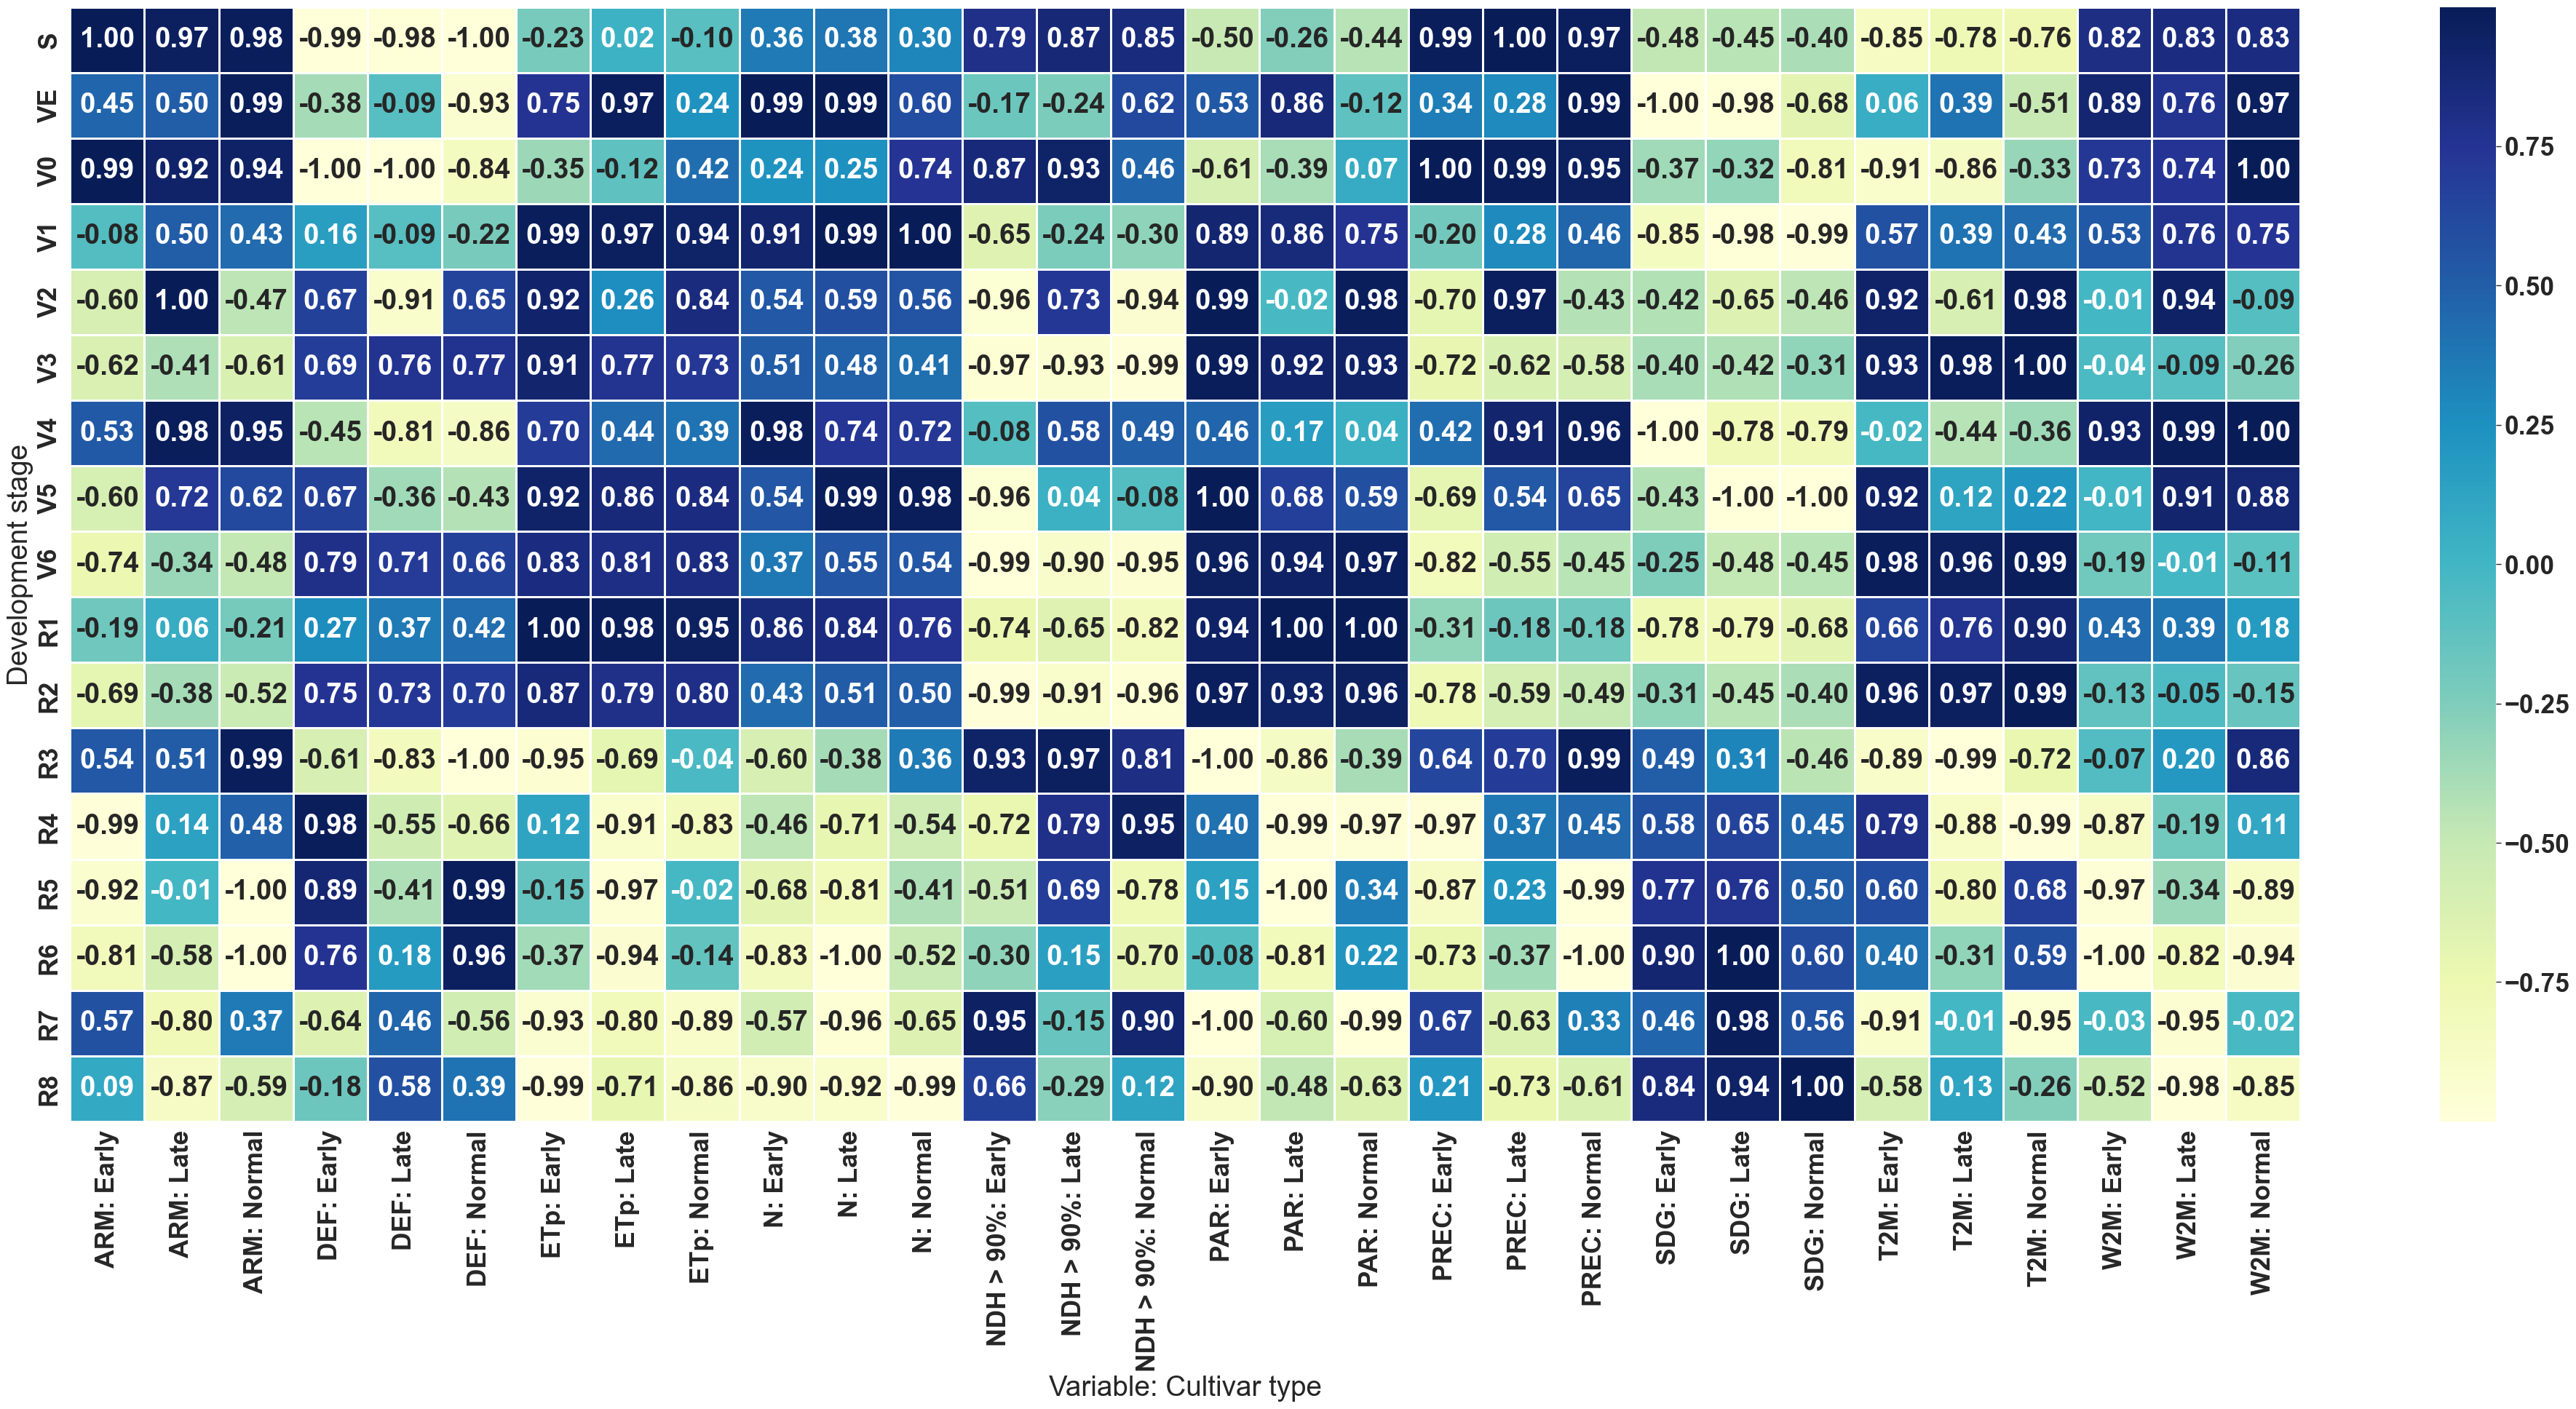

In [61]:
# Criar um mapa de calor para visualizar a influência
sns.set_theme(style="white", context="paper", font_scale=2.9)
plt.figure(figsize=(40, 20))
sns.heatmap(influencia_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=1)
#plt.title("Influência dos Eigenvectors nos Estágios de Desenvolvimento por Tipo de Cultivar")
plt.ylabel("Development stage")
plt.xlabel("Variable: Cultivar type")
plt.xticks(rotation=90)
plt.tight_layout()

# Saving figure
fig_path = os.path.join(os.getcwd(), 'images', "Figure 6.jpg")
#plt.savefig(fig_path, dpi=600)

plt.show()